In [23]:
from cooking_bot.data_formats import *
from cooking_bot import REPO_PATH
from glob import glob
from tqdm import tqdm
import os
import random
from cooking_bot.intent_detector import IntentDetector
from cooking_bot.recipy_query import get_recipes
from cooking_bot.intents import *

intent_detector = IntentDetector()

os.chdir(REPO_PATH)

In [13]:
recipes : list[Recipe] = []

for id, path in enumerate(random.choices(glob("jsons/*.json"), k = 10)):
    
    with open(path, "r") as f:

        data = f.read()
    
    recipe = Recipe.model_validate_json(data)
    recipes.append(recipe)

In [14]:
[recipe.displayName for recipe in recipes]

['Baby Shells Bechamel',
 'Whole Grilled Parrot Fish',
 'Cilantro-Lime Dressing',
 'Chinese Takeout-Style Sweet and Sour Spare Ribs',
 'Double Chocolate Pancakes',
 'Boiled Potatoes',
 'How To Make Chocolate Pound Cake',
 'How to Make Perfect Guacamole',
 'Pasta Carbonara with English Peas',
 'How To Make Fattoush (Middle Eastern Bread Salad) at Home']

In [16]:
titles = ['Baby Shells Bechamel',
 'Whole Grilled Parrot Fish',
 'Cilantro-Lime Dressing',
 'Chinese Takeout-Style Sweet and Sour Spare Ribs',
 'Double Chocolate Pancakes',
 'Boiled Potatoes',
 'How To Make Chocolate Pound Cake',
 'How to Make Perfect Guacamole',
 'Pasta Carbonara with English Peas',
 'How To Make Fattoush (Middle Eastern Bread Salad) at Home']

In [49]:
cooking_requests = [
    "I want to cook Baby Shells Bechamel tonight. Can you help?",
    "Can you show me how to prepare Grilled Parrot Fish, please.",
    "Could you provide the recipe for a Dressing Cilantro-Lime?",
    "Do you have the recipe for Chinese Sweet and Sour Spare Ribs?",
    "I’m craving Chocolate Pancakes. How do I make them?",
    "Give me the steps for Boiled Potatoes.",
    "Chocolate Pound Cake.",
    "What ingredients do I need for perfect Guacamole?",
    "Carbonara with English Peas recipe, please.",
    "Tell me how to make Fattoush at Home."
]

In [50]:
def eval_specific_query(request : str, recipe) -> int:

    intent : RecipyIntent = intent_detector.get_recipy_intent(request)
    if intent.category != RecipyCategory.Specific:
        return 10

    result = get_recipes(request, intent, 10)[0]
    for pos, sugg in enumerate(result.hits):
        if sugg.displayName == recipe.displayName:
            return pos
        
    return 10

In [51]:
scores = [eval_specific_query(cooking_requests[i], recipes[i]) for i in range(len(recipes))]
scores

21:56:19 | DEBUG | Recipy Intent Prediction: RecipyCategory.Specific - TimeCategory.No - Difficulty.No
21:56:20 | DEBUG | Extracted name - 'Baby Shells Bechamel'
/home/felix/miniconda3/envs/nlp/lib/python3.9/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.novasearch.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
21:56:20 | DEBUG | Recipy Intent Prediction: RecipyCategory.Specific - TimeCategory.No - Difficulty.No
21:56:20 | DEBUG | Extracted name - 'Grilled Parrot Fish'
/home/felix/miniconda3/envs/nlp/lib/python3.9/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.novasearch.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
21:56:21 

[0, 0, 0, 0, 0, 0, 0, 10, 0, 2]

In [35]:
request = "Tell me how to make Fattoush at Home."
intent : RecipyIntent = intent_detector.get_recipy_intent(request)

result = get_recipes(request, intent, 10)[0]
[i.displayName for i in result.hits[:3]]

21:44:55 | DEBUG | Recipy Intent Prediction: RecipyCategory.Specific - TimeCategory.No - Difficulty.No


21:44:55 | DEBUG | Extracted name - 'Fattoush at Home'
/home/felix/miniconda3/envs/nlp/lib/python3.9/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.novasearch.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


['Ceviche at Home',
 'How To Make Crispy Tempura At Home',
 'How To Make Fattoush (Middle Eastern Bread Salad) at Home']

In [52]:
random.seed(0)

In [68]:
# with_imgs = []

paths = glob("jsons/*.json")
random.shuffle(paths)

for path in tqdm(paths):
    with open(path, "r") as f:

        data = f.read()
    
    
    recipe = Recipe.model_validate_json(data)
    if recipe.images and recipe.images[0].get_image() is not None:
        with_imgs.append(recipe)
        
    if len(with_imgs) == 25:
        break

  0%|          | 0/994 [00:00<?, ?it/s]

  0%|          | 4/994 [00:01<06:03,  2.72it/s]


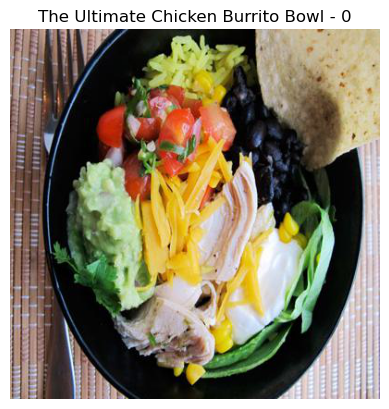

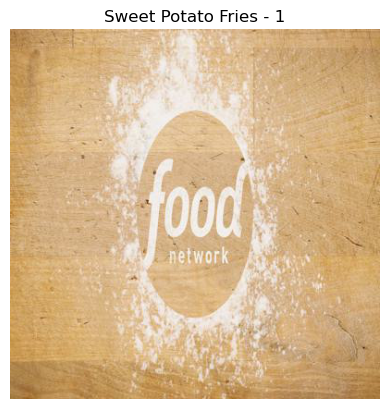

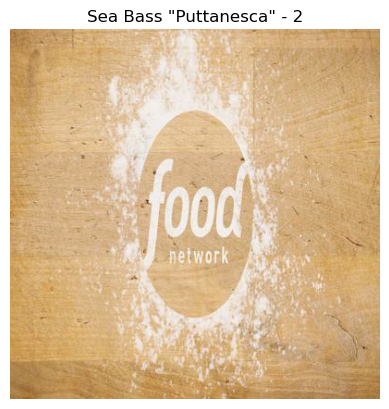

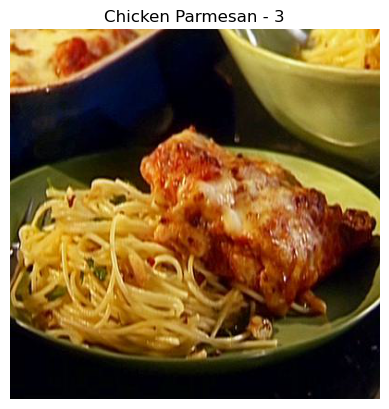

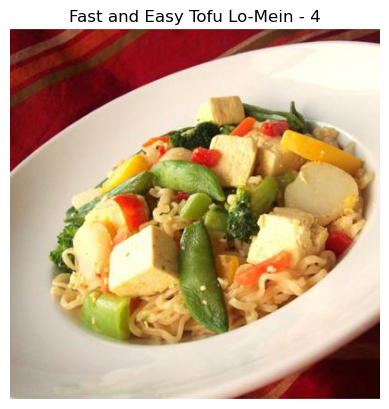

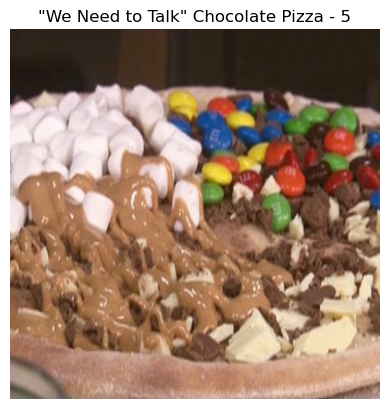

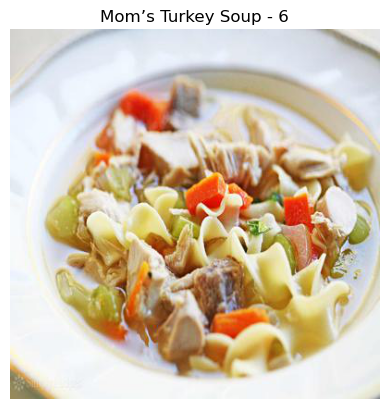

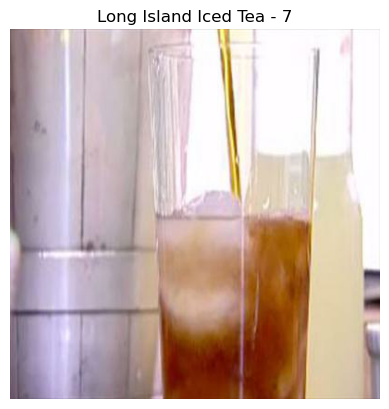

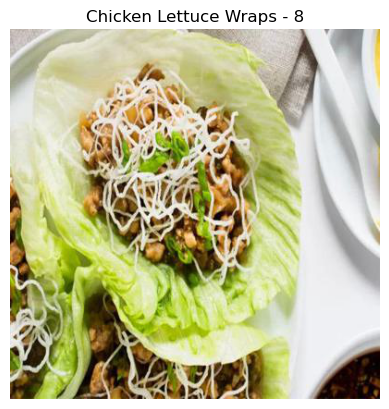

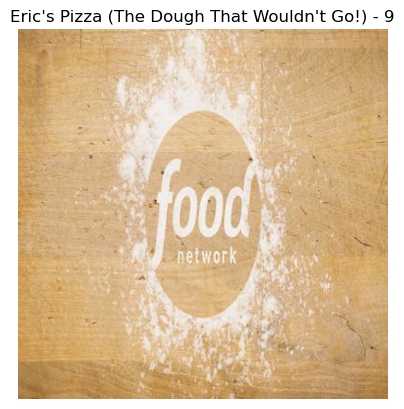

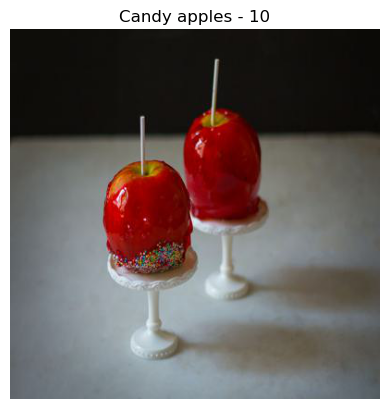

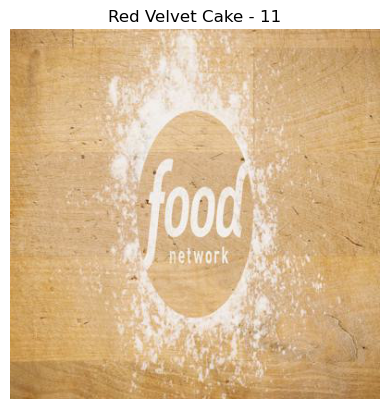

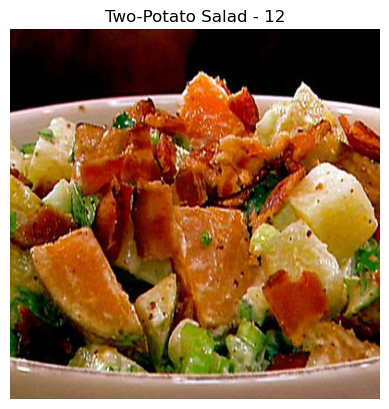

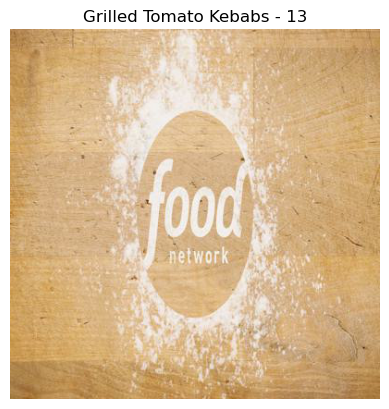

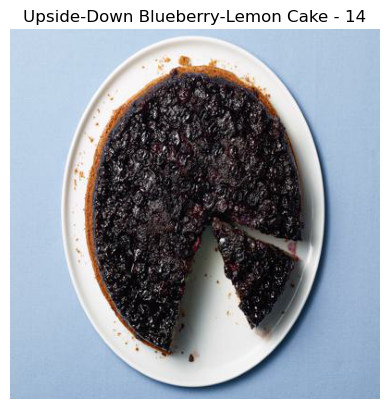

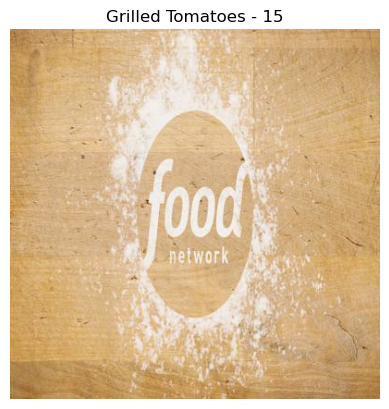

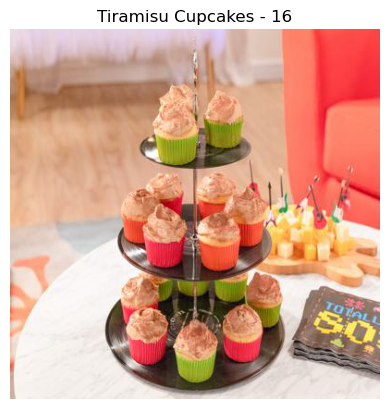

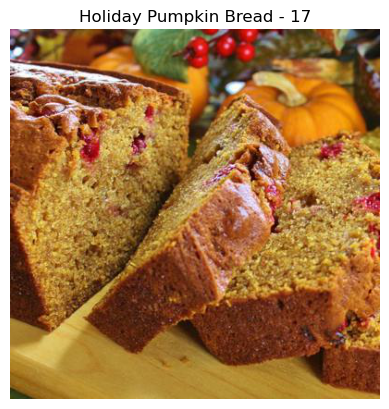

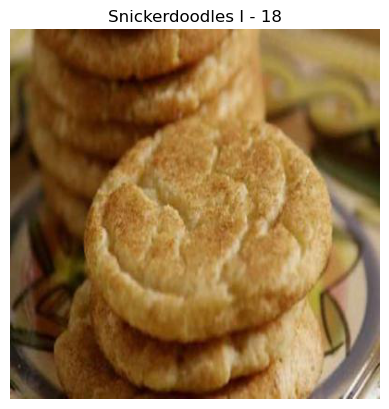

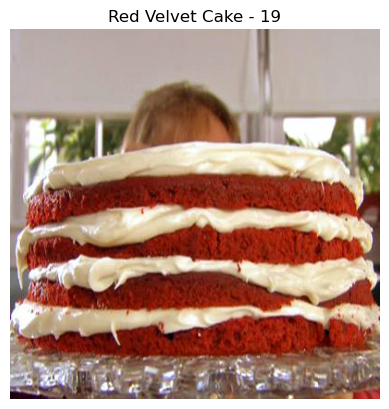

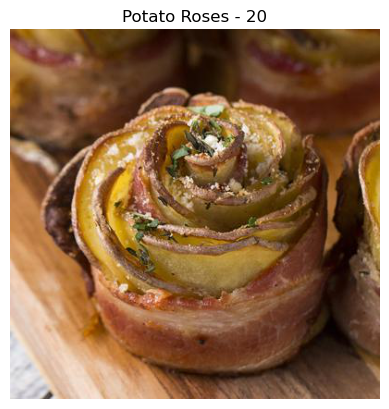

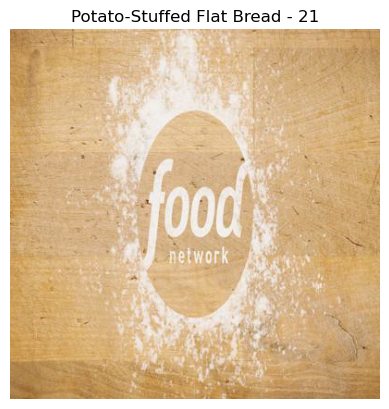

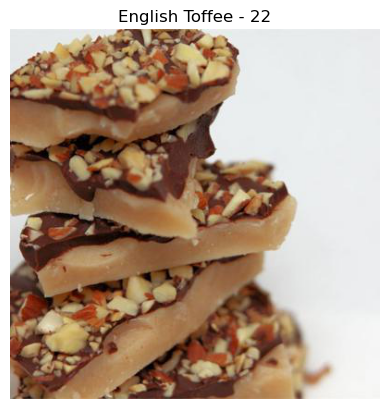

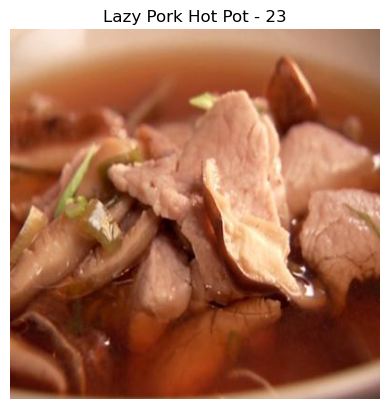

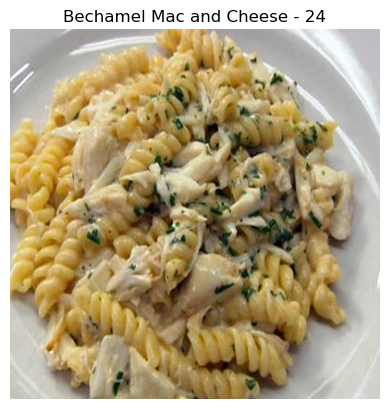

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x7BF4D2A69F10>


In [70]:
import matplotlib.pyplot as plt

for i,recipe in enumerate(with_imgs):
       
    plt.imshow(recipe.images[0].get_image())
    plt.title(f"{recipe.displayName} - {i}")
    plt.axis("off")
    plt.show()

print(with_imgs[0].images[0].get_image())

In [82]:
visual_queries = [
    ("I want something that looks like a healthy chicken burrito bowl", 0),
    ("I want to cook something that resembles a messy sweet dish with various sweets on a pizza", 5),
    ("Give me something that appears incredibly healthy, maybe a wrap made out of salad with chicken", 8),
    ("I want something very sweet, like sugar-coated apples with candies sprinkled on top", 10),
    ("I want to bake a lovely looking cake full of blueberries", 14),
    ("I want to cook a bizarre looking red multi-layer cake", 19),
    ("Let's cook something that looks very fancy, like potatoes shaped like roses with herbs on top", 20),
    ("I want something simple but visually appealing, like noodles with bechamel sauce on top", 24),
    ("Let's cook some Asian-looking dish", 4),
    ("I need fancy looking cupcakes which I can place on a dessert tower, maybe with tiramisu", 16)
]


In [83]:
def eval_viz_query(request : str, recipe) -> int:

    intent : RecipyIntent = intent_detector.get_recipy_intent(request)
    if intent.category != RecipyCategory.LookBased:
        return 10

    result = get_recipes(request, intent, 10)[0]
    for pos, sugg in enumerate(result.hits):
        if sugg.displayName == recipe.displayName:
            return pos
        
    return 10

res = [eval_viz_query(q, with_imgs[i]) for q,i in visual_queries]

22:30:23 | DEBUG | Recipy Intent Prediction: RecipyCategory.LookBased - TimeCategory.No - Difficulty.No


/home/felix/miniconda3/envs/nlp/lib/python3.9/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.novasearch.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
22:30:24 | DEBUG | Recipy Intent Prediction: RecipyCategory.LookBased - TimeCategory.No - Difficulty.No
/home/felix/miniconda3/envs/nlp/lib/python3.9/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.novasearch.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
22:30:24 | DEBUG | Recipy Intent Prediction: RecipyCategory.LookBased - TimeCategory.No - Difficulty.No
/home/felix/miniconda3/envs/nlp/lib/python3.9/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverifi

In [84]:
res

[1, 0, 10, 0, 0, 0, 7, 10, 10, 10]

In [15]:
for recipe in recipes:
    
    print(recipe.displayName)
    print("Ingredients: ", ", ".join([i.displayText for i in recipe.ingredients]))
    print("Time needed", recipe.totalTimeMinutes, "number of seteps", len(recipe.instructions))
    print("-"*10,"\n"*2, )

Baby Shells Bechamel
Ingredients:  ½ cup cherry tomatoes, 2 tablespoons olive oil , Kosher salt and freshly ground black pepper , 4 tablespoons unsalted butter , ¼ cup all-purpose flour , 2 cups whole milk, warm, 1 pound baby shell pasta, cooked to very al dente , Torn fresh basil, for garnish , ¼ cup shaved Parmesan
Time needed 45 number of seteps 5
---------- 


Whole Grilled Parrot Fish
Ingredients:  2 ti leaves or banana leaves, 1 whole uhu (parrot fish), scored (about 5 pounds), Salt, 1 cup mayonnaise, ¼ cup prepared pesto, 4 lap xiong or Chinese sausage, diced, 2 cloves garlic, crushed and minced, 2 large Hamakua mushrooms, diced, 1 bunch green onions, sliced into 2-inch pieces, ¼ cup reserved for garnish, ½ yellow onion, diced
Time needed 55 number of seteps 4
---------- 


Cilantro-Lime Dressing
Ingredients:  1  jalapeno pepper, seeded and coarsely chopped, 1 clove garlic, ¾ teaspoon minced fresh ginger root, ¼ cup lime juice, ⅓ cup honey, 2 teaspoons balsamic vinegar, ½ teaspo

In [87]:
ingredient_based_queries = [
    "What can I cook with cherry tomatoes, basil, olive oil, and Parmesan?",
    "Find recipes using parrot fish, banana leaves, and Chinese sausage",
    "Can I make a dressing with jalapeno pepper, lime juice, and honey?",
    "What dishes can I prepare with spare ribs, ginger, and soy sauce?",
    "I have whole wheat flour, cocoa powder, and strawberries. What can I bake?",
    "What simple dishes can I make with red boiling potatoes and parsley?",
    "Recipes using vanilla extract, espresso, and sour cream for a cake?",
    "How to use avocados, lime juice, and red onions for guacamole?",
    "What pasta dishes can I make with pancetta, peas, and pecorino cheese?",
    "Fattoush recipe ideas with pita bread, sumac, and cherry tomatoes?"
]

def eval_ing(request : str, recipe) -> int:

    intent : RecipyIntent = intent_detector.get_recipy_intent(request)
    if intent.category != RecipyCategory.Ingredient:
        return 10

    result = get_recipes(request, intent, 10)[0]
    for pos, sugg in enumerate(result.hits):
        if sugg.displayName == recipe.displayName:
            return pos
        
    return 10

res = [eval_ing(q, r) for q,r in zip(ingredient_based_queries, recipes)]
res

23:07:37 | DEBUG | Recipy Intent Prediction: RecipyCategory.Ingredient - TimeCategory.No - Difficulty.No


23:07:37 | DEBUG | Extrated ingredients ['cherry', 'tomatoes', 'basil', 'olive', 'oil', 'parmesan']
/home/felix/miniconda3/envs/nlp/lib/python3.9/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.novasearch.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
23:07:37 | DEBUG | Recipy Intent Prediction: RecipyCategory.Ingredient - TimeCategory.No - Difficulty.No
23:07:37 | DEBUG | Extrated ingredients ['parrot', 'fish', 'banana', 'leaves', 'chinese', 'sausage']
/home/felix/miniconda3/envs/nlp/lib/python3.9/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.novasearch.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
23:07:38 | DEBUG | Recipy 

[0, 0, 0, 0, 0, 10, 10, 10, 0, 10]